## **CREACIÓN DE MODELOS**

Se busca analizar la probabilidad que algunos de los asteriores en orbita con el sistema solar pueda tener un impacto con el planeta tierra, este análisis se le denomina MOID de sus siglas en ingles, "Minimum Orbit Intersection Distance" se procederán a desarrollar los modelos con el próposito de encontrar cual de ellos es mas consecuente con la variable objetivo

In [2]:
# DATA
import pandas as pd

total_data_mv= pd.read_csv('../Project/total_data_mv.csv')
total_data_mv.head(1)

,H,a,q,ad,n,tp_cal,per_y,moid,class_n
0,18.2,2.268877,1.952481,2.585274,0.288395,2.018092e+07,3.417628,0.968024,0


### **Arboles de desicion**

In [3]:
# Se ha seleccionado por ser fácil de interpretar y útil para relaciones no lineales.

test_data = pd.read_csv("..\Project\clean_test.csv")
train_data = pd.read_csv("..\Project\clean_train.csv")

train_data.head(3)

<>:3: SyntaxWarning: invalid escape sequence '\P'
<>:4: SyntaxWarning: invalid escape sequence '\P'
<>:3: SyntaxWarning: invalid escape sequence '\P'
<>:4: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Ortoactiva\AppData\Local\Temp\ipykernel_27600\381050518.py:3: SyntaxWarning: invalid escape sequence '\P'
  test_data = pd.read_csv("..\Project\clean_test.csv")
C:\Users\Ortoactiva\AppData\Local\Temp\ipykernel_27600\381050518.py:4: SyntaxWarning: invalid escape sequence '\P'
  train_data = pd.read_csv("..\Project\clean_train.csv")


,H,a,q,ad,n,tp_cal,per_y,class_n,moid
0,0.407666,0.912023,0.037829,0.001088,0.147871,0.532186,0.000176,0.0,1.03289
1,0.365854,0.912127,0.054196,0.001715,0.091676,0.532060,0.000284,0.0,1.89951
2,0.341463,0.912127,0.048251,0.001940,0.091424,0.528845,0.000285,0.0,1.67084


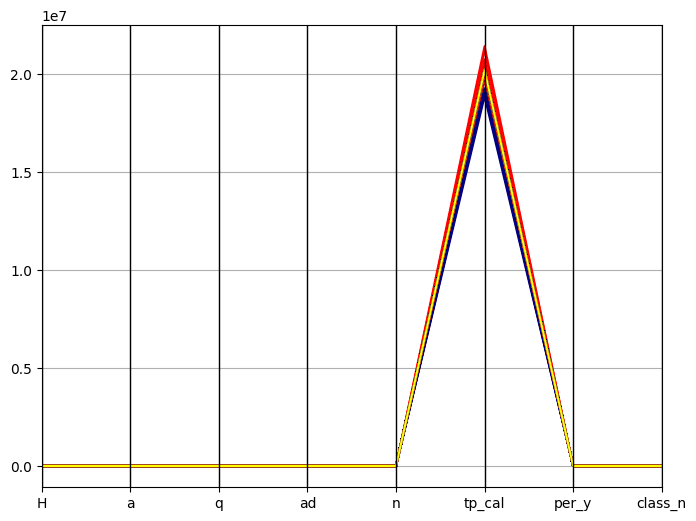

In [4]:
import matplotlib.pyplot as plt

# Existe un error de codigo con la base de datos original,la imagen generada es demasiado grande para ser procesada y visualizada, por lo que se graficara un muestra

# Seleccionar una muestra aleatoria de 10000 filas
sampled_data = total_data_mv.sample(n=10000, random_state=42)

plt.figure(figsize=(8, 6))
pd.plotting.parallel_coordinates(sampled_data, "moid", color=("red", "navy", "yellow"))
plt.legend([], [], frameon=False)  # Eliminar la leyenda
plt.show()


In [5]:
X_train = train_data.drop(["moid"], axis = 1)
y_train = train_data["moid"]
X_test = test_data.drop(["moid"], axis = 1)
y_test = test_data["moid"]

In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Convertir valores continuos a categorías discretas con 3 clases
y_train_discrete = pd.cut(y_train, bins=3, labels=["bajo", "medio", "alto"])
y_test_discrete = pd.cut(y_test, bins=3, labels=["bajo", "medio", "alto"])

# Crear y entrenar el modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train_discrete)

# Predecir y evaluar
y_pred = model.predict(X_test)
print("Predicciones:", y_pred)

# Al utilizar el modelo de defecto "clasificador", arrojaba error ya que los valores eran continuos, se ha optimizado el modelo con una variable discreta que son especificas de este tipo de datos


Predicciones: ['bajo' 'bajo' 'bajo' ... 'bajo' 'bajo' 'bajo']


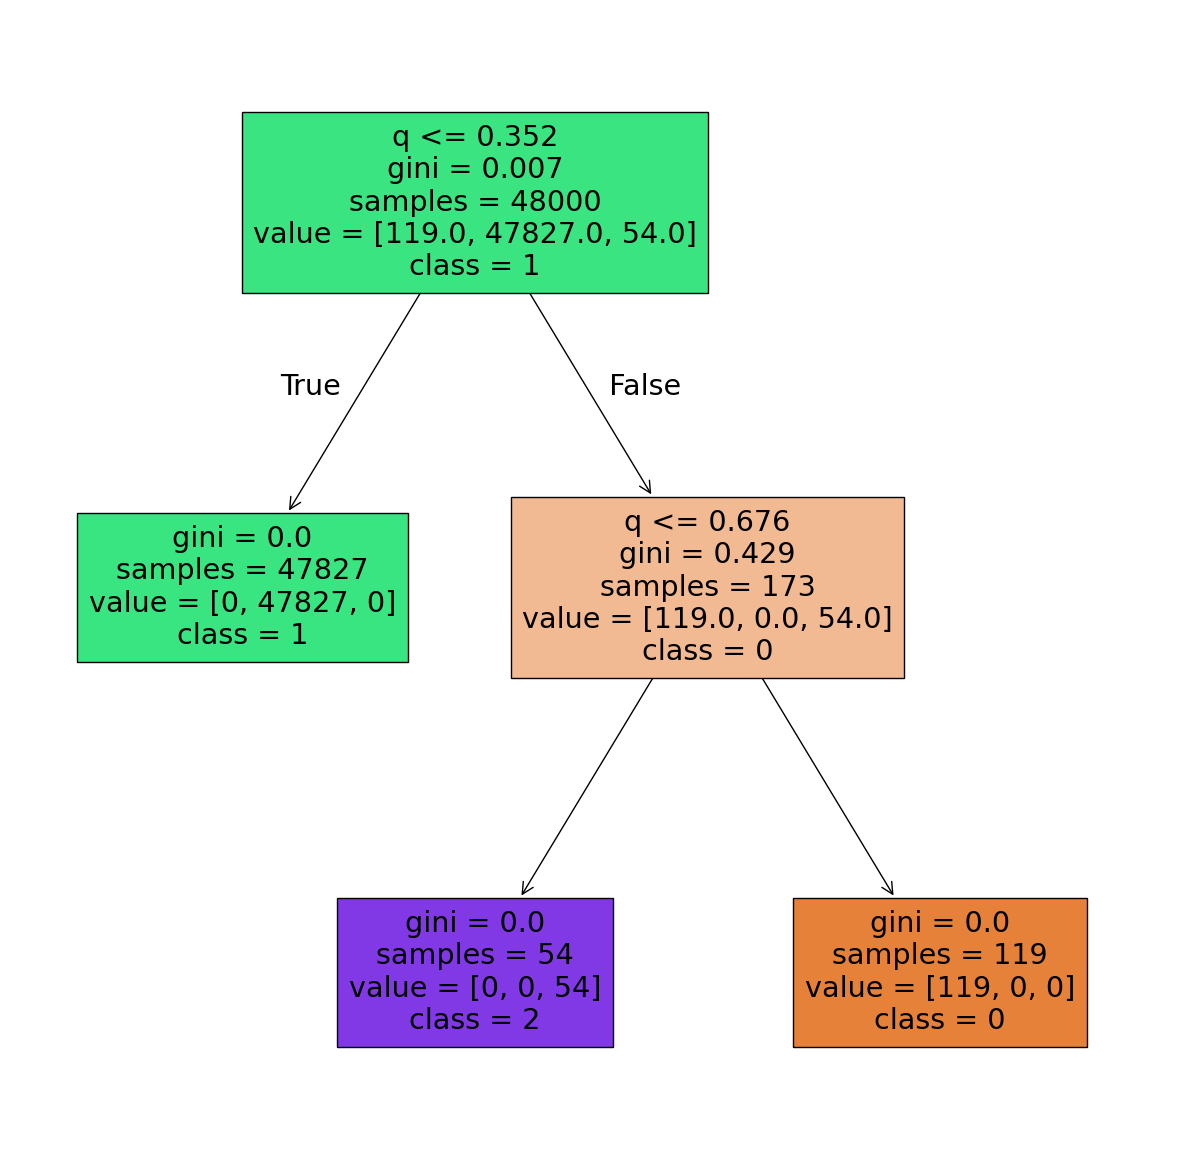

In [7]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [8]:
y_pred = model.predict(X_test)
y_pred

array(['bajo', 'bajo', 'bajo', ..., 'bajo', 'bajo', 'bajo'], dtype=object)

In [9]:
# Optimización del modelo 

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import warnings

# Función para suprimir advertencias
def warn(*args, **kwargs):
    pass

warnings.warn = warn

X = total_data_mv.drop(columns=["moid"])
y = total_data_mv["moid"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir valores continuos de MOID a categorías discretas con 3 clases
y_train_discrete = pd.cut(y_train, bins=3, labels=["bajo", "medio", "alto"])
y_test_discrete = pd.cut(y_test, bins=3, labels=["bajo", "medio", "alto"])

# Crear el modelo de DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

# Definir el grid de hiperparámetros a buscar
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Crear el GridSearchCV con validación cruzada de 5 pliegues
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train_discrete)

# Mostrar los mejores hiperparámetros encontrados
print(f"Mejores hiperparámetros: {grid.best_params_}")

# Evaluar el modelo con los mejores hiperparámetros en el conjunto de prueba
y_pred = grid.predict(X_test)
accuracy = accuracy_score(y_test_discrete, y_pred)
print("Exactitud:", accuracy)



Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Exactitud: 0.99975


In [10]:
from sklearn.tree import DecisionTreeRegressor

# Crear un modelo de regresión de árbol de decisión
model = DecisionTreeRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)

model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Crear un modelo de regresión de árbol de decisión
model = DecisionTreeRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo (por ejemplo, calcular el error cuadrático medio)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio: {mse}")


Error cuadrático medio: 0.01180676365586987


In [12]:
import numpy as np

# Función para calcular "accuracy" para valores continuos
def accuracy_continuous(y_true, y_pred, tolerance=0.5):
    correct = np.abs(y_true - y_pred) <= tolerance
    return np.mean(correct)

# Ejemplo de uso
y_true = np.array([1.5, 2.0, 3.7, 4.1])
y_pred = np.array([1.7, 1.8, 3.6, 4.3])

acc = accuracy_continuous(y_true, y_pred, tolerance=0.5)
print(f"Accuracy score: {acc}")


Accuracy score: 1.0


### **Regresión lineal**

In [13]:
# Este modelo establece una relación matemática entre variables independientes y una variable dependiente "moid", permitiendo predecir valores continuos de MOID en función de las características que se seleccionen.

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercep (a): -0.8781074044708763
Coefficients (b1, b2): [-4.47399051e-04  3.33041613e-01  8.30730686e-01 -1.64647460e-01
  2.31042676e-01 -7.52397389e-09 -1.41449512e-04  1.08265770e-02]


In [15]:
y_pred = model.predict(X_test)
y_pred

array([1.09643014, 0.96742467, 0.7617644 , ..., 0.97142847, 0.17060072,
       1.50845939])

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 523.8487924555128
R2 Score: -159.66434861815844


Se descarta por que para mejorar el modelo de predicción del MOID, sería deseable reducir el MSE y aumentar el R^2 Score hacia valores más cercanos a 1. Esto se podría lograr ajustando el modelo, considerando más características relevantes y/o aumentando la cantidad de datos de entrenamiento, también utilizando métodos de modelado más avanzados que puedan capturar mejor las relaciones en los datos del MOID.

### **K-Nearest Neighbors**

In [17]:
# Se selecciona este modelo porque trabajaba basándose en características específicas, proporcionando una herramienta crítica para la evaluación de riesgos de colisión

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# X contiene las características relevantes y y contiene los valores de MOID
X = total_data_mv[['H', 'a', 'q', 'ad', 'n', 'tp_cal', 'per_y', 'class_n']]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características (es opcional pero recomendado para k-NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear un modelo de k-Nearest Neighbors Regressor
k = 5  # Número de vecinos
model = KNeighborsRegressor(n_neighbors=k)

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train_scaled, y_train)

# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test_scaled)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error (MSE): 0.09319733592789957
R^2 Score: 0.9714163905969578


Pendiente de conclusión.

### **Random Forest regressor**

Mean Squared Error (MSE): 0.0047308846179628375
R^2 Score: 0.9985490383742801


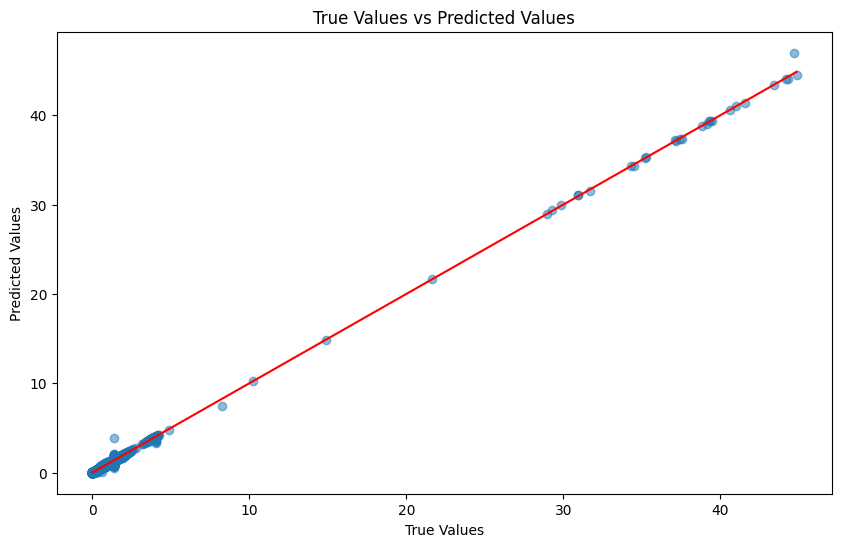

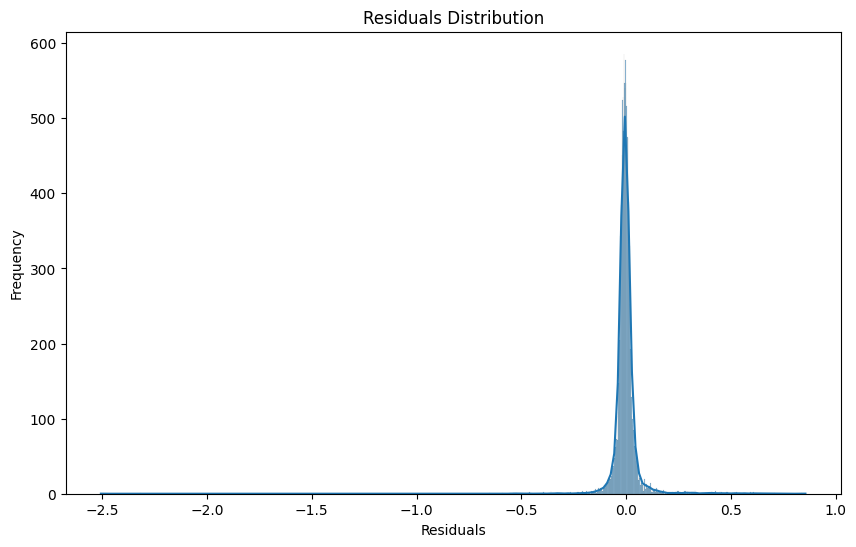

In [19]:
# Se selecciona por ser efectivo para capturar interacciones complejas entre las características orbitales y el MOID, proporcionando predicciones concretas y generalizables. Además es ideal para datos grandes y variados sin sobreajuste.

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

# X contiene las características relevantes y y contiene los valores de MOID
X = total_data_mv[['H', 'a', 'q', 'ad', 'n', 'tp_cal', 'per_y', 'class_n']]  
y = total_data_mv['moid']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características (es opcional pero recomendado para Random Forest)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear un modelo de Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train_scaled, y_train)

# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test_scaled)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

# Visualizar los resultados con gráficos
# Plotting the true values vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect prediction line
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values')
plt.show()

# Plotting the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

Los resultados obtenidos nos demuestrasn que el modelo a sido evaluado y entrenado con éxito.

Los resultados obtenidos se pueden valorar de la siguiente forma:

Mean Squared Error (MSE): 0.0047308846179628375

El MSE es una métrica que mide la diferencia entre los valores predichos y los valores reales. Un valor bajo de MSE indica que el modelo es capaz de hacer predicciones precisas.
En nuestro caso, el MSE es muy bajo, lo que sugiere que el modelo es capaz de hacer predicciones muy precisas.


R^2 Score: 0.9985490383742801

El R^2 Score es una métrica que mide la variabilidad en los datos que es explicada por el modelo. Un valor cercano a 1 indica que el modelo explica la mayoría de la variabilidad en los datos.
En nuestro caso, el R^2 Score es muy alto, lo que sugiere que el modelo es capaz de explicar la mayoría de la variabilidad en los datos de MOID.

Conclusión:

En general, los resultados sugieren que el modelo de Random Forest Regressor es muy efectivo para predecir los valores de MOID a partir de las características orbitales. La baja MSE y el alto R^2 Score indican que el modelo es capaz de hacer predicciones precisas y generalizables.

Ventajas del modelo

El modelo de Random Forest Regressor es capaz de capturar interacciones complejas entre las características orbitales y el MOID.
El modelo es robusto y no se sobreajusta, lo que lo hace ideal para datos grandes y variados.

### **Gradient boosting regressor**

Es otro método de aprendizaje conjunto que construye una serie de modelos de forma secuencial, donde cada nuevo modelo corrige los errores del modelo anterior. Utiliza árboles de decisión como estimadores base y optimiza una función de pérdida diferenciable para mejorar las predicciones.

Se selecciona por su capacidad probada para mejorar predicciones en problemas de regresión mediante la construcción secuencial de árboles de decisión, corrigiendo errores de modelos anteriores y manejando relaciones no lineales de manera efectiva. Este captura la complejidad de las relaciones entre las características orbitales y el MOID, ofreciendo una alta precisión y evitando el sobreajuste mediante la regularización incorporada (esta última se refiere a técnicas integradas en los modelos de aprendizaje automático que ayudan a prevenir el sobreajuste y mejorar la generalización del modelo).


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# X contiene las características relevantes y y contiene los valores de MOID
X = total_data_mv[['H', 'a', 'q', 'ad', 'n', 'tp_cal', 'per_y', 'class_n']] 
y = total_data_mv['moid']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características, es opcional pero recomendado para Gradient Boosting
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear un modelo de Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train_scaled, y_train)

# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test_scaled)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error (MSE): 0.004040932003745131
R^2 Score: 0.9987606467409255


Pendiente de conclusión